In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 17 22:04:30 2021

@author: chunshanliu
"""


'\nCreated on Wed Mar 17 22:04:30 2021\n\n@author: chunshanliu\n'

In [2]:
import pandas as pd
import sqlite3
import glob
import numpy as np
import os
import urllib
import datetime
from pandas import DataFrame

from sqlalchemy import create_engine
import pymysql

import matplotlib.pyplot as plt



ipykernel_launcher:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


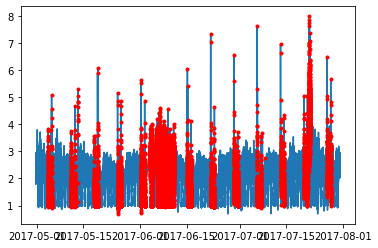

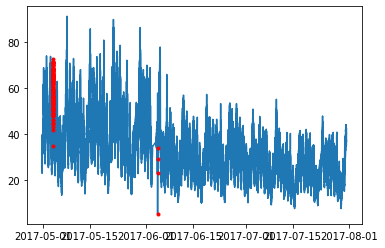

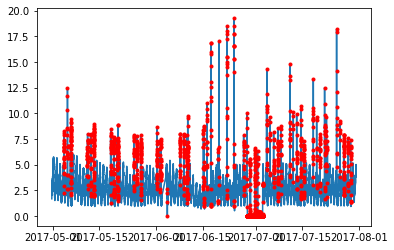

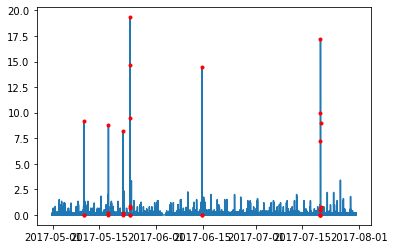

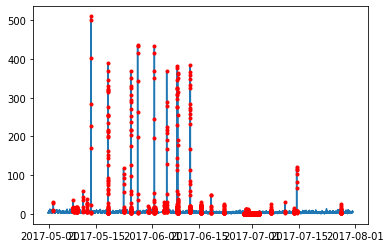

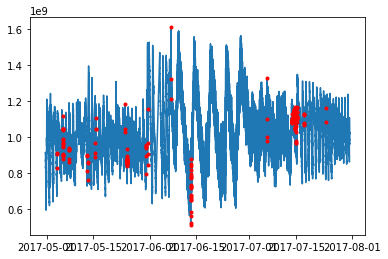

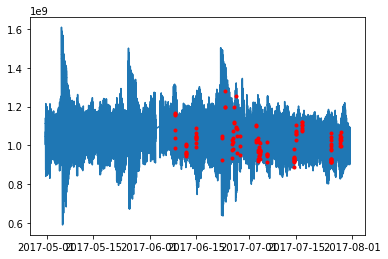

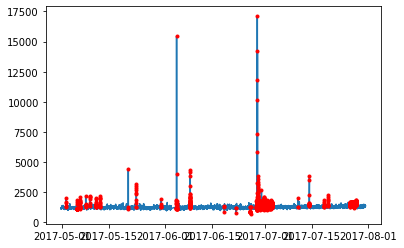

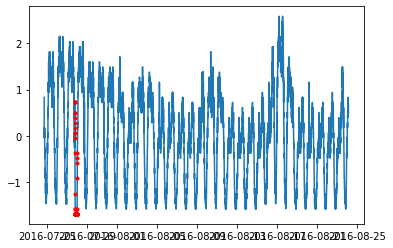

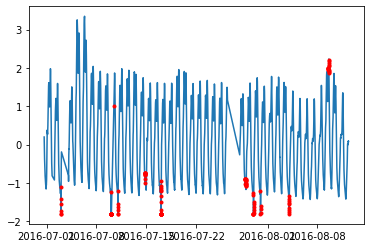

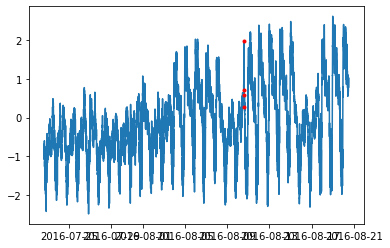

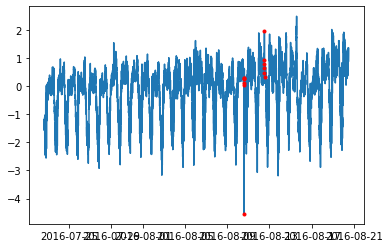

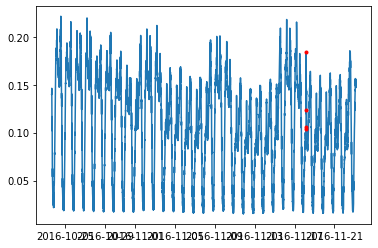

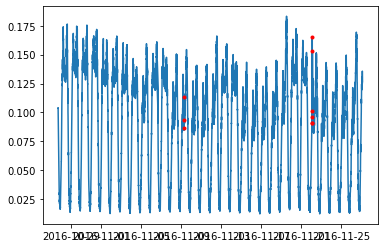

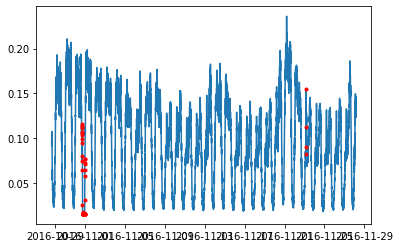

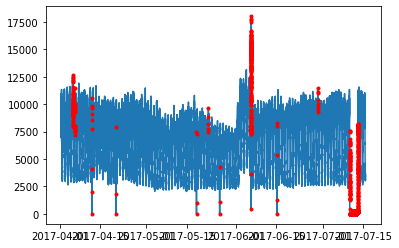

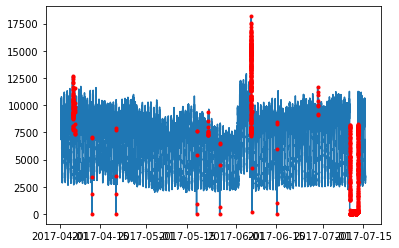

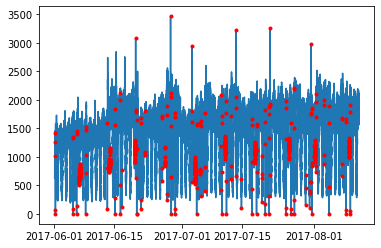

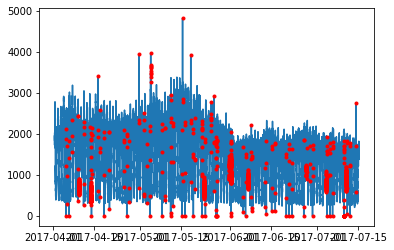

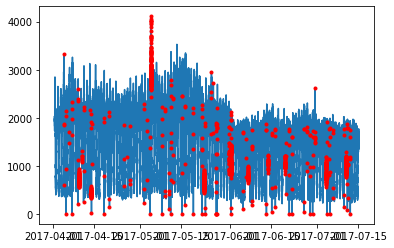

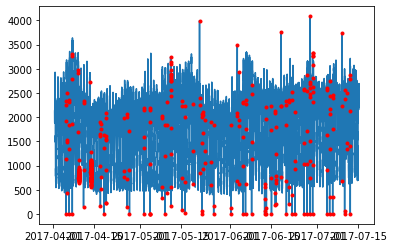

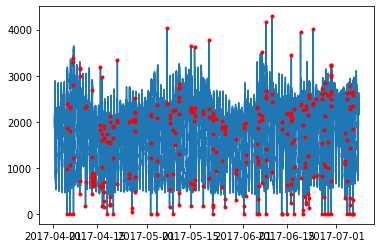

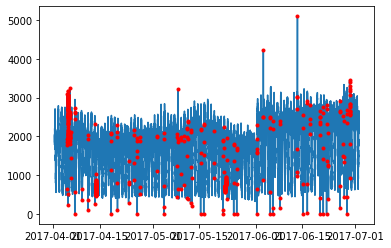

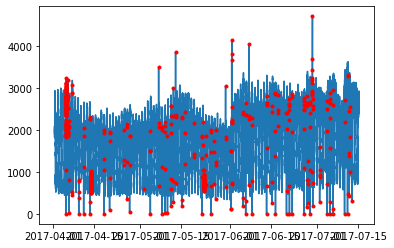

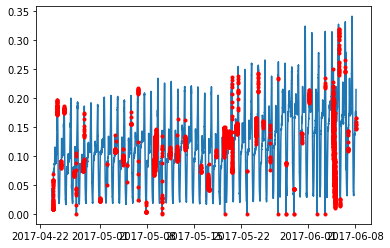

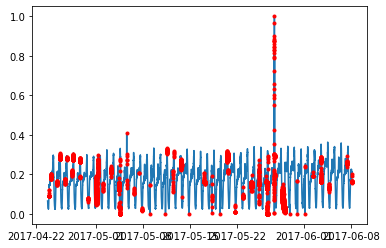

In [3]:
filename = "library/csv/train.csv"

df = pd.read_csv(filename) # Read data (data is not too large, thus read it directly from file)

df.head() # first few columns of the dataframe (table), noted "KPI ID" not convenient to call

df = df.rename(columns={'KPI ID':'KPI'}) # Rename column "KPI ID" with "KPI"

KPI_unique = df.KPI.unique() # Get the list of unique KPI: there are 26 KPI names, each of which is very long

df.KPI.replace(KPI_unique,list(range(len(KPI_unique))),inplace=True) # Replace the manes with 0:25

KPI_unique = df.KPI.unique()


EPOCH = datetime.datetime(1970, 1, 1)
df['Time'] = EPOCH + pd.to_timedelta(df.timestamp,unit = 's')

## Produce some sample plots


for id in KPI_unique:
    df_tmp = df[df.KPI==id]
    fig = plt.figure()
    plt.plot(df_tmp.Time,df_tmp.value)
    df_tmp_anomalous = df_tmp[df_tmp.label==1]
    plt.plot(df_tmp_anomalous.Time,df_tmp_anomalous.value,'.r')
    # plt.plot(df_tmp.Time,df_tmp.label)
    